In [241]:
import pandas as pd
from pprint import pprint
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
low_memory=False

In [242]:
# Load movie data

csv_file= "Resources/final_movie_data.csv"
movie_data_csv = pd.read_csv(csv_file)

# Create dataframe
movie_data_df = pd.DataFrame(movie_data_csv)
movie_data_df 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,movie_title,title_year,genres,budget,gross,director_name,director_facebook_likes,...,movie_facebook_likes,content_rating,imdb_score,aspect_ratio,plot_keywords,facenumber_in_poster,movie_imdb_link,review_text,movie_poster,movie_description
0,0,0,0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,237000000.0,760505847.0,James Cameron,0.0,...,33000,PG-13,7.9,1.78,avatar|future|marine|native|paraplegic,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,I saw this epic last night at the Empire Leice...,https://ia.media-imdb.com/images/M/MV5BMTYwOTE...,"When his brother is killed in a robbery, p..."
1,1,1,1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,300000000.0,309404152.0,Gore Verbinski,563.0,...,0,PG-13,7.1,2.35,goddess|marriage ceremony|marriage proposal|pi...,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Less than a year after the previous installmen...,https://ia.media-imdb.com/images/M/MV5BMjIyNjk...,"After Elizabeth, Will, and Captain Barboss..."
2,2,2,2,Spectre,2015.0,Action|Adventure|Thriller,245000000.0,200074175.0,Sam Mendes,0.0,...,85000,PG-13,6.8,2.35,bomb|espionage|sequel|spy|terrorist,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Despite an initial action scene full of CGI th...,https://ia.media-imdb.com/images/M/MV5BOWQ1MDE...,A cryptic message from the past sends Jame...
3,3,3,3,The Dark Knight Rises,2012.0,Action|Thriller,250000000.0,448130642.0,Christopher Nolan,22000.0,...,164000,PG-13,8.5,2.35,deception|imprisonment|lawlessness|police offi...,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The best thing about this movie is how satisfy...,https://ia.media-imdb.com/images/M/MV5BMTk4ODQ...,Despite his tarnished reputation after the...
4,4,4,5,John Carter,2012.0,Action|Adventure|Sci-Fi,263700000.0,73058679.0,Andrew Stanton,475.0,...,24000,PG-13,6.6,2.35,alien|american civil war|male nipple|mars|prin...,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,Add my voice to those underwhelmed by the late...,https://ia.media-imdb.com/images/M/MV5BYTk3MDl...,"John Carter, a Civil War veteran, who in 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,3751,3751,5026,Clean,2004.0,Drama|Music|Romance,4500.0,136007.0,Olivier Assayas,107.0,...,171,R,6.9,2.35,jail|junkie|money|motel|singer,1.0,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,NaN,NaN,London-based Emily Wang gained minor notor...
3752,3752,3752,5027,The Circle,2000.0,Drama,10000.0,673780.0,Jafar Panahi,397.0,...,697,Not Rated,7.5,1.85,abortion|bus|hospital|prison|prostitution,0.0,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,NaN,NaN,In a hospital waiting room a woman learns ...
3753,3753,3753,5033,Primer,2004.0,Drama|Sci-Fi|Thriller,7000.0,424760.0,Shane Carruth,291.0,...,19000,PG-13,7.0,1.85,changing the future|independent film|invention...,0.0,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,NaN,NaN,"Engineers Aaron, Abe, Robert and Phillip a..."
3754,3754,3754,5035,El Mariachi,1992.0,Action|Crime|Drama|Romance|Thriller,7000.0,2040920.0,Robert Rodriguez,0.0,...,0,R,6.9,1.37,assassin|death|guitar|gun|mariachi,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,NaN,NaN,El Mariachi just wants to play his guitar ...


In [275]:
# Explode/split genre column into multiple rows
genre_data_df = movie_data_df.loc[:,["genres", "movie_title", "movie_facebook_likes", "imdb_score", "gross"]].groupby("genres").mean()
genre_data_df


,movie_facebook_likes,imdb_score,gross
genres,,,
Action,7017.833333,5.916667,5.952091e+07
Action|Adventure,9444.444444,6.877778,1.388692e+08
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,2000.000000,6.200000,1.359691e+07
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,20500.000000,7.950000,1.228235e+08
Action|Adventure|Animation|Comedy|Family,10000.000000,7.160000,1.801411e+08
...,...,...,...
Mystery|Thriller,10478.500000,6.737500,5.729192e+07
Romance|Sci-Fi|Thriller,36000.000000,7.100000,6.245332e+07
Sci-Fi|Thriller,7857.142857,6.628571,2.979379e+07


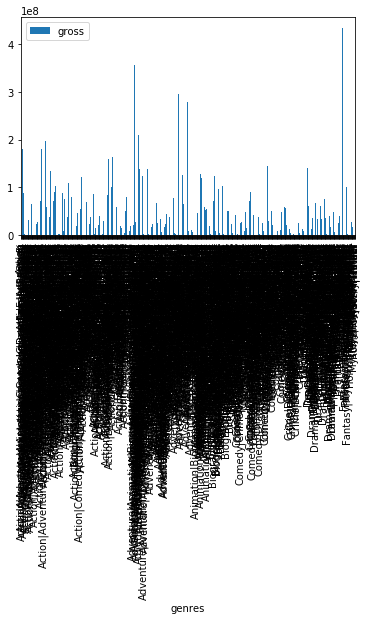

In [280]:
plot_1 = genre_data_df.reset_index().plot.bar(x="genres", y="gross", rot=90)
plt.show()

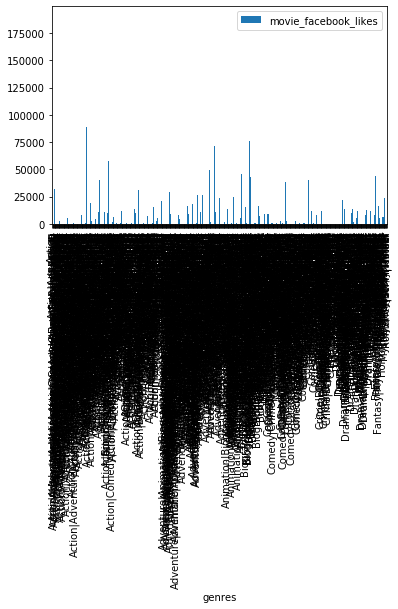

In [282]:
plot_2 = genre_data_df.reset_index().plot.bar(x="genres", y="movie_facebook_likes", rot=90)
plt.show()

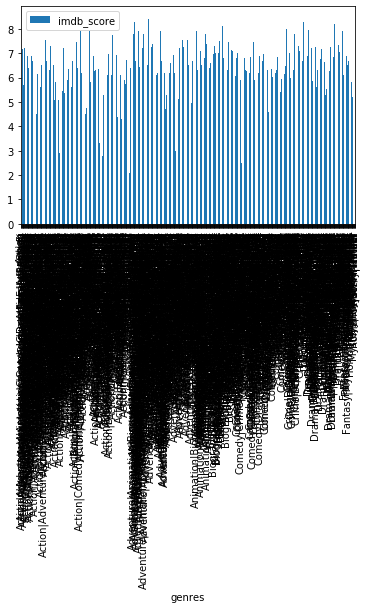

In [283]:
plot_3 = genre_data_df.reset_index().plot.bar(x="genres", y="imdb_score", rot=90)
plt.show()

In [287]:
recent_movies_df = movie_data_df.loc[movie_data_df["title_year"].astype("int32") >=2000,:]
recent_movies_sorted = recent_movies_df.sort_values("title_year", ascending=False)
recent_movies_sorted

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,movie_title,title_year,genres,budget,gross,director_name,director_facebook_likes,...,movie_facebook_likes,content_rating,imdb_score,aspect_ratio,plot_keywords,facenumber_in_poster,movie_imdb_link,review_text,movie_poster,movie_description
2755,2755,2755,3094,The Purge: Election Year,2016.0,Action|Horror|Sci-Fi|Thriller,10000000.0,78845130.0,James DeMonaco,65.0,...,0,R,6.1,2.35,cathedral|minister|presidential election|refer...,1.0,http://www.imdb.com/title/tt4094724/?ref_=fn_t...,NaN,https://ia.media-imdb.com/images/M/MV5BNmJkODc...,It's been seventeen years since Leo Barnes...
540,540,540,567,The Angry Birds Movie,2016.0,Action|Animation|Comedy|Family,73000000.0,107225164.0,Clay Kaytis,6.0,...,14000,PG,6.3,1.85,butt|downward duck|fish|kingfisher|pig,0.0,http://www.imdb.com/title/tt1985949/?ref_=fn_t...,I highly enjoyed this movie. It fits nicely wi...,https://ia.media-imdb.com/images/M/MV5BMjEyNTc...,"In the 3D animated comedy, The Angry Birds..."
726,726,726,762,London Has Fallen,2016.0,Action|Crime|Drama|Thriller,60000000.0,62401264.0,Babak Najafi,24.0,...,28000,R,5.9,2.35,british|funeral|good versus evil|mole|sequel,3.0,http://www.imdb.com/title/tt3300542/?ref_=fn_t...,I just got done watching a midnight showing of...,https://ia.media-imdb.com/images/M/MV5BMTc5NzA...,After the British Prime Minister has passe...
55,55,55,57,Star Trek Beyond,2016.0,Action|Adventure|Sci-Fi|Thriller,185000000.0,130468626.0,Justin Lin,681.0,...,30000,PG-13,7.5,2.35,hatred|sequel|space opera|star trek|third part,4.0,http://www.imdb.com/title/tt2660888/?ref_=fn_t...,I thought this movie was actually good. It was...,https://ia.media-imdb.com/images/M/MV5BMTA0Nzg...,"After stopping off at Starbase Yorktown, a..."
366,366,366,380,Now You See Me 2,2016.0,Action|Adventure|Comedy|Crime|Mystery|Thriller,90000000.0,64685359.0,Jon M. Chu,209.0,...,15000,PG-13,6.9,2.35,card trick|london england|magician|rain machin...,6.0,http://www.imdb.com/title/tt3110958/?ref_=fn_t...,Being from the west coast I never had a whole ...,https://ia.media-imdb.com/images/M/MV5BODExYTM...,One year after outwitting the FBI and winn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,1868,1868,2024,The Whole Nine Yards,2000.0,Comedy|Crime,24000000.0,57262492.0,Jonathan Lynn,36.0,...,0,R,6.7,1.85,adultery|black humor|dentist|hitman|sex in bed,4.0,http://www.imdb.com/title/tt0190138/?ref_=fn_t...,NaN,https://ia.media-imdb.com/images/M/MV5BMjE3NDI...,"Montreal, Canada. A down-on-his luck denti..."
418,418,418,435,The 6th Day,2000.0,Action|Mystery|Sci-Fi|Thriller,82000000.0,34543701.0,Roger Spottiswoode,55.0,...,0,PG-13,5.9,2.35,clone|cloning|future|laser gun|murder,1.0,http://www.imdb.com/title/tt0216216/?ref_=fn_t...,Just watched this movie few hours ago. It was ...,https://ia.media-imdb.com/images/M/MV5BMTQ2MjA...,"In the near future, cloning is now technic..."
1873,1873,1873,2029,Return to Me,2000.0,Comedy|Drama|Romance,24000000.0,32662299.0,Bonnie Hunt,597.0,...,0,PG,6.9,1.85,heart|italian restaurant|restaurant|transplant...,1.0,http://www.imdb.com/title/tt0122459/?ref_=fn_t...,NaN,https://ia.media-imdb.com/images/M/MV5BZGE0Y2R...,The film opens with a loving husband and w...
410,410,410,426,Nutty Professor II: The Klumps,2000.0,Comedy|Romance|Sci-Fi,65000000.0,123307945.0,Peter Segal,88.0,...,374,PG-13,4.3,1.85,alter ego|marriage|professor|scientist|serum,1.0,http://www.imdb.com/title/tt0144528/?ref_=fn_t...,I don't know why this film didn't do better at...,https://ia.media-imdb.com/images/M/MV5BMTkwOTU...,Professor Sherman Klump is getting married...
